In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import cv2
import os

['Picture 15.jpg', 'Picture 17.jpg', 'Picture 22.jpg', '1.jpg', 'Picture 19.jpg', 'Picture 23.jpg', 'Picture 18.jpg', 'Picture 16.jpg', 'Picture 25.jpg', 'Picture 14.jpg', 'Picture 24.jpg', 'Picture 20.jpg', 'Picture 21.jpg']


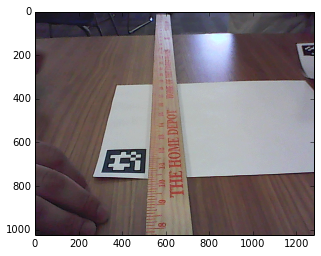

In [72]:
img_files = os.listdir("/home/jason/ipython_notebooks/img")
img = cv2.imread("img/Picture 15.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#print img
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.imshow(img)


print img_files

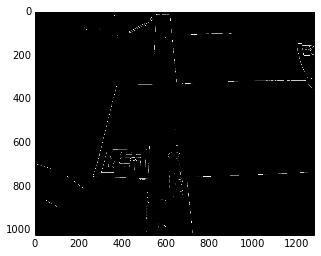

In [12]:
#gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#img2 = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)
#plt.imshow(img2)
img = cv2.imread("img/Picture 15.jpg")
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(img, (7,7), 0), cv2.COLOR_BGR2GRAY)
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))


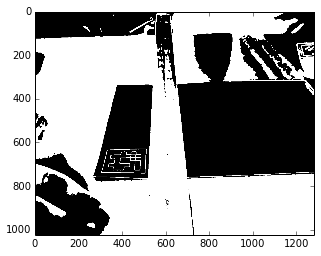

In [13]:
img = cv2.imread("img/Picture 15.jpg")
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blurred = cv2.cvtColor(cv2.GaussianBlur(img2, (7,7), 0), cv2.COLOR_RGB2GRAY)
_, threshold_img = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)
_, threshold_img2 = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)

res = cv2.bitwise_and(threshold_img, threshold_img2)

# show image

img = cv2.cvtColor(res, cv2.COLOR_GRAY2RGB)
plt.imshow(img)

In [ ]:
img = cv2.imread("img/Picture 23.jpg")
#print img
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(1,1),1000)
flag, thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#contours = sorted(contours, key=cv2.contourArea,reverse=True) 

plt.imshow(contours)
for i in range(len(contours)):
    card = contours[i]
    peri = cv2.arcLength(card,True)
    approx = cv2.approxPolyDP(card,0.02*peri,True)
    rect = cv2.minAreaRect(contours[2])
    r = cv2.cv.BoxPoints(rect)


h = np.array([ [0,0],[449,0],[449,449],[0,449] ],np.float32)
print approx
#transform = cv2.getPerspectiveTransform(approx,h)
#warp = cv2.warpPerspective(img,transform,(450,450))

#img = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
plt.imshow(img)



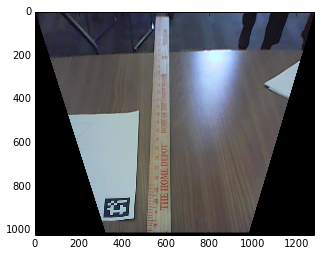

In [43]:
img = cv2.imread("img/Picture 23.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h = np.array([ [0,0],[1000,0],[1000,1000],[0,1000] ],np.float32)
o = np.array([ [0,0],[1000,0],[1316,1000],[-616,1000] ],np.float32)
transform = cv2.getPerspectiveTransform(o,h)
warp = cv2.warpPerspective(img,transform,(1000,000))
plt.imshow(warp)

In [ ]:
img = cv2.imread("img/Picture 23.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red = np.array([50,150,50])
upper_red = np.array([255,255,180])
lower = cv2.cvtColor(np.uint8([[[10,0,0]]]), cv2.COLOR_BGR2HSV)
upper = cv2.cvtColor(np.uint8([[[50,0,0]]]), cv2.COLOR_BGR2HSV)

mask_red = cv2.inRange(img, lower_red, upper_red)
mask_green = cv2.inRange(img, np.array([50, 30 ,150]), np.array([60,255, 255]))
mask_blue = cv2.inRange(img, np.array([110,50,50]), np.array([130,255,255]))
#mask_black = cv2.inRange(img, np.array([0,0,10]), np.array([0,0,255]))
res = cv2.bitwise_and(img, img, mask = mask_red)

disp = cv2.cvtColor(mask_red, cv2.COLOR_GRAY2RGB)
plt.imshow(disp)

#print cv2.cvtColor(np.uint8([[[255,255,255]]]), cv2.COLOR_BGR2HSV)

'\n#rows,cols = img.shape\ny = np.zeros((300,300),np.uint8)  # for output\n\n#imx = np.array(0,0)\nfor i in range(300):\n    #imy = np.array(0,0)\n    for j in range(300):\n        if abs(var(img[i+550][j+300])) > 47000:\n            #imy.append(list(img[i+550][j+350]))\n            #imy = np.append(imy, 130.0)\n            y.itemset((i,j), 130.0)\n        else:\n            gray = 0.2989 * img[i+550][j+300][0] + 0.5870 * img[i+550][j+300][1] + 0.1140 * img[i+550][j+300][2]\n            y.itemset((i,j), gray)\n            #imy = np.append(imy, gray)\n    #imx = np.append(imx, imy )\nprint y\n#imx = np.float32(imx)\n#imx = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)\nimx = cv2.cvtColor(y, cv2.COLOR_GRAY2RGB)\nplt.imshow(imx)\n\n'

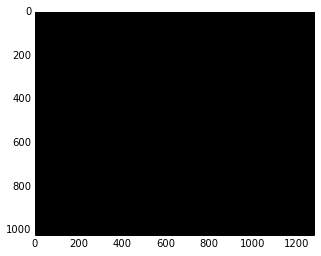

In [4]:

import scipy

def avg(x):
    return sum(x)*1.0/len(x)
def var(x):
    return avg(map(lambda i: (i-avg(x)**2), x))

img = cv2.imread("img/Picture 15.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#win_rows,win_cols,color = img.shape

def filter_var(x):
    if abs(var(x)) > 47000:
        return 130.0 #np.array([100.0, 200, 50])
    else:
        gray = 0.2989 * x[0] + 0.5870 * x[1] + 0.1140 * x[2]
        return gray

#img = scipy.ndimage.filters.generic_filter(img, np.std, size=1)
#img = scipy.ndimage.uniform_filter(img, )

#win_rows, win_cols = 130,130
#win_mean = scipy.ndimage.uniform_filter(img,(win_rows,win_cols))
#win_sqr_mean = scipy.ndimage.uniform_filter(img**2,(win_rows,win_cols))
#win_var = win_sqr_mean - win_mean**2
#win_var = scipy.ndimage.uniform_filter(win_var, 1)


"""
def filter_var(x):
    if abs(var(x)) > 47000:
        #imy.append(list(img[i+550][j+350]))
        #imy = np.append(imy, 130.0)
        #y.itemset((i,j), 130.0)
        return 130.0 #np.array([100.0, 200, 50])
    else:
        #gray = np.array([0.2989 * x[0], 0.5870 * x[1], 0.1140 * x[2]])
        gray = 0.2989 * x[0] + 0.5870 * x[1] + 0.1140 * x[2]
        return gray
def filter_gray(x):
    return np.array([0.2989 * x[0], 0.5870 * x[1], 0.1140 * x[2]])

img = scipy.ndimage.generic_filter(img, filter_var, size=(3))

"""
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)
#print [win_var[653][i+300] for i in range(100)]
#print win_var

"""
#rows,cols = img.shape
y = np.zeros((300,300),np.uint8)  # for output

#imx = np.array(0,0)
for i in range(300):
    #imy = np.array(0,0)
    for j in range(300):
        if abs(var(img[i+550][j+300])) > 47000:
            #imy.append(list(img[i+550][j+350]))
            #imy = np.append(imy, 130.0)
            y.itemset((i,j), 130.0)
        else:
            gray = 0.2989 * img[i+550][j+300][0] + 0.5870 * img[i+550][j+300][1] + 0.1140 * img[i+550][j+300][2]
            y.itemset((i,j), gray)
            #imy = np.append(imy, gray)
    #imx = np.append(imx, imy )
print y
#imx = np.float32(imx)
#imx = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
imx = cv2.cvtColor(y, cv2.COLOR_GRAY2RGB)
plt.imshow(imx)

"""

#print img[400][400]
#print var(img[400][400])

In [ ]:
import math

movingList = []
currentSum = 0
currentLen = 0
def movingAvg(x):
    global currentLen
    global currentSum
    if len(movingList) >= 10:
        movingList.append(x)
        g = movingList.pop(0)
        currentSum -= g/float(10)
        currentSum += x/float(10)
        return currentSum
    else:
        movingList.append(x)
        currentSum += x/float(10)
        currentLen += 1
 


movingAvgList = []
movingVarList = []
currentAvg = 0
currentVar = 0
currentVarLen = 0
def movingVar(x):
    global currentVarLen
    global currentAvg
    global currentVar
    if len(movingAvgList) >= 10:
        movingAvgList.append(x)
        g = movingAvgList.pop(0)
        currentAvg -= g/float(10)
        currentAvg += x/float(10)
        d = (x-currentAvg)**2/float(10)
        movingVarList.append(d)
        f = movingVarList.pop(0)
        currentVar += g
        currentVar -= f
        return math.sqrt(abs(currentVar)) # (x-currentAvg)**2
    else:
        movingAvgList.append(x)
        currentAvg += x/float(10)
        currentVarLen += 1
        movingVarList.append((x-currentAvg)**2/float(10))
        currentVar += movingVarList[-1]

import random
def avg(x):
    return sum(x)*1.0/len(x)
def var(x):
    return avg(map(lambda i: (i-avg(x)**2), x))
f = [movingAvg(random.random()) for i in range(50)]
#print f
print var(filter(lambda x: (x != None), f))
print avg(filter(lambda x: (x != None), f))
#print avg([random.random() for i in range(50)])
#print range(10).pop(1)

[[[326 487]]

 [[234 493]]

 [[224 552]]

 [[316 539]]] (275, 517)


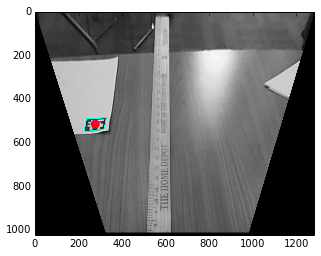

In [91]:

def avg(x):
    return sum(x)*1.0/len(x)
def var(x):
    return avg(map(lambda i: (i-avg(x)**2), x))



#['Picture 15.jpg', 'Picture 17.jpg', 'Picture 22.jpg', '1.jpg', 'Picture 19.jpg', 'Picture 23.jpg', 
#'Picture 18.jpg', 'Picture 16.jpg', 'Picture 25.jpg', 'Picture 14.jpg', 'Picture 24.jpg', 'Picture 20.jpg', 
#'Picture 21.jpg']



img = cv2.imread("img/Picture 24.jpg")

plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


h = np.array([ [0,0],[1000,0],[1000,1000],[0,1000] ],np.float32)
o = np.array([ [0,0],[1000,0],[1316,1000],[-616,1000] ],np.float32)
transform = cv2.getPerspectiveTransform(o,h)
img = cv2.warpPerspective(img,transform,(1000, 0))



#sx = scipy.ndimage.sobel(img, axis=0)
#sy = scipy.ndimage.sobel(img, axis=1)
#sob = np.hypot(sx, sy)

gray = cv2.bilateralFilter(img, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200)

# find contours in the edged image, keep only the largest
# ones, and initialize our screen contour
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

# loop over our contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
print screenCnt,
if len(screenCnt) > 0:
    position = tuple(int(i) for i in avg(screenCnt)[0])
    print position
    cv2.circle(img, position, 20, (255, 2, 23), -1)
#cv2.rectangle(img,tuple(position),(1000,500),(0,0,255),15)
cv2.drawContours(img, [screenCnt], -1, (0, 255, 232), 3)
#cv2.imshow("Game Boy Screen", image)
#cv2.waitKey(0)
        
#print sob[0][:50]
#sob = np.array(sob, np.uint8)
#img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)

